In [1]:
import pandas as pd 
import numpy as np 

International football results from 1872 to 2023를 불러옴

In [2]:
df= pd.read_csv('results.csv')

In [3]:
df["date"] = pd.to_datetime(df["date"])

In [4]:
df.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

사용되는 데이터셋은 2015년 아시안컵 이후 2023년 아시안컵 직전까지의 FIFA 게임 데이터

In [7]:
df = df[(df["date"] >= "2014-12-30")].reset_index(drop=True)

In [8]:
df.sort_values("date").tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
8023,2023-10-17,Sri Lanka,Yemen,1,1,FIFA World Cup qualification,Colombo,Sri Lanka,False
8024,2023-10-17,Taiwan,Timor-Leste,3,0,FIFA World Cup qualification,Kaohsiung,Taiwan,False
8026,2023-10-17,Angola,DR Congo,0,0,Friendly,Setúbal,Portugal,True
8014,2023-10-17,Uruguay,Brazil,2,0,FIFA World Cup qualification,Montevideo,Uruguay,False
8055,2023-10-23,United Arab Emirates,Kuwait,1,0,Friendly,Dubai,United Arab Emirates,False


In [9]:
df.home_team.value_counts()

United States    98
Mexico           91
Japan            79
Qatar            78
South Korea      74
                 ..
Saint Helena      1
Romani people     1
Aymara            1
Ticino            1
Hmong             1
Name: home_team, Length: 278, dtype: int64

FIFA World Ranking 1992-2023 불러온 후 동일하게 2015년 아시안컵 이후 2023년 아시안컵 직전까지의 FIFA 게임 데이터로 분리

In [10]:
rank= pd.read_csv('fifa_ranking-2023-07-20.csv')

In [11]:
rank.dtypes

rank                 int64
country_full        object
country_abrv        object
total_points       float64
previous_points    float64
rank_change          int64
confederation       object
rank_date           object
dtype: object

In [12]:
rank["rank_date"] = pd.to_datetime(rank["rank_date"])
rank = rank[(rank["rank_date"] >= "2014-12-30")].reset_index(drop=True)

같은 국가인데 이름이 다르게 사용되는 경우를 하나로 합쳐줌 

In [13]:
rank["country_full"] = rank["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea")

In [14]:
rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
16820,66,Cabo Verde,CPV,1354.65,1354.65,0,CAF,2023-07-20
16821,67,Iceland,ISL,1352.98,1352.98,0,UEFA,2023-07-20
16822,68,North Macedonia,MKD,1350.53,1350.53,0,UEFA,2023-07-20
16823,58,Jamaica,JAM,1409.73,1367.83,-5,CONCACAF,2023-07-20
16824,205,US Virgin Islands,VIR,816.59,816.59,-3,CONCACAF,2023-07-20


불러온 두개의 데이터셋의 merge 해주자 

In [15]:
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

In [16]:
df_wc_ranked = df.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)

df_wc_ranked = df_wc_ranked.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)

In [17]:
df_wc_ranked.dtypes

date                    datetime64[ns]
home_team                       object
away_team                       object
home_score                       int64
away_score                       int64
tournament                      object
city                            object
country                         object
neutral                           bool
total_points_home              float64
previous_points_home           float64
rank_home                      float64
rank_change_home               float64
total_points_away              float64
previous_points_away           float64
rank_away                      float64
rank_change_away               float64
dtype: object

In [18]:
df_wc_ranked[(df_wc_ranked.home_team == "South Korea") | (df_wc_ranked.away_team == "South Korea")].tail(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
5961,2022-09-27,South Korea,Cameroon,1,0,Friendly,Seoul,South Korea,False,1526.02,1526.20,28.0,0.0,1484.95,1484.95,38.0,0.0
5997,2022-11-11,South Korea,Iceland,1,0,Friendly,Hwaseong,South Korea,False,1530.30,1526.02,28.0,0.0,1384.41,1379.61,62.0,-1.0
6084,2022-11-24,Uruguay,South Korea,0,0,FIFA World Cup,Al Rayyan,Qatar,True,1638.71,1640.95,14.0,1.0,1530.30,1526.02,28.0,0.0
6099,2022-11-28,South Korea,Ghana,2,3,FIFA World Cup,Al Rayyan,Qatar,True,1530.30,1526.02,28.0,0.0,1393.00,1393.47,61.0,1.0
6115,2022-12-02,South Korea,Portugal,2,1,FIFA World Cup,Al Rayyan,Qatar,True,1530.30,1526.02,28.0,0.0,1676.56,1678.65,9.0,0.0
6120,2022-12-05,Brazil,South Korea,4,1,FIFA World Cup,Doha,Qatar,True,1841.30,1837.56,1.0,0.0,1530.30,1526.02,28.0,0.0
6200,2023-03-24,South Korea,Colombia,2,2,Friendly,Ulsan,South Korea,False,1539.49,1530.30,25.0,-3.0,1612.78,1611.04,17.0,0.0
6289,2023-03-28,South Korea,Uruguay,1,2,Friendly,Seoul,South Korea,False,1539.49,1530.30,25.0,-3.0,1627.45,1638.71,16.0,2.0
6350,2023-06-16,South Korea,Peru,0,1,Friendly,Busan,South Korea,False,1536.01,1539.49,27.0,2.0,1561.20,1564.30,21.0,0.0
6413,2023-06-20,South Korea,El Salvador,1,1,Friendly,Daejeon,South Korea,False,1536.01,1539.49,27.0,2.0,1318.30,1326.86,75.0,1.0


오케이 이제 데이터셋은 준비됐고 Feature enigineering 통해서 예측에 필요한 특성 생성해보자 
- 이전 게임에서 획득한 포인트
- 이전에 득점한 득점과 허용된 득점
- 게임의 중요성(친선 경기인지 아닌지)
- 팀의 랭킹
- 팀의 랭킹 증가
- 랭킹에 따른 득점과 허용된 득점
>위와 같은 특성 반영해보자

In [19]:
df = df_wc_ranked

In [20]:
def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0])
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = df.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)

In [21]:
df[["result", "home_team_points", "away_team_points"]] = results

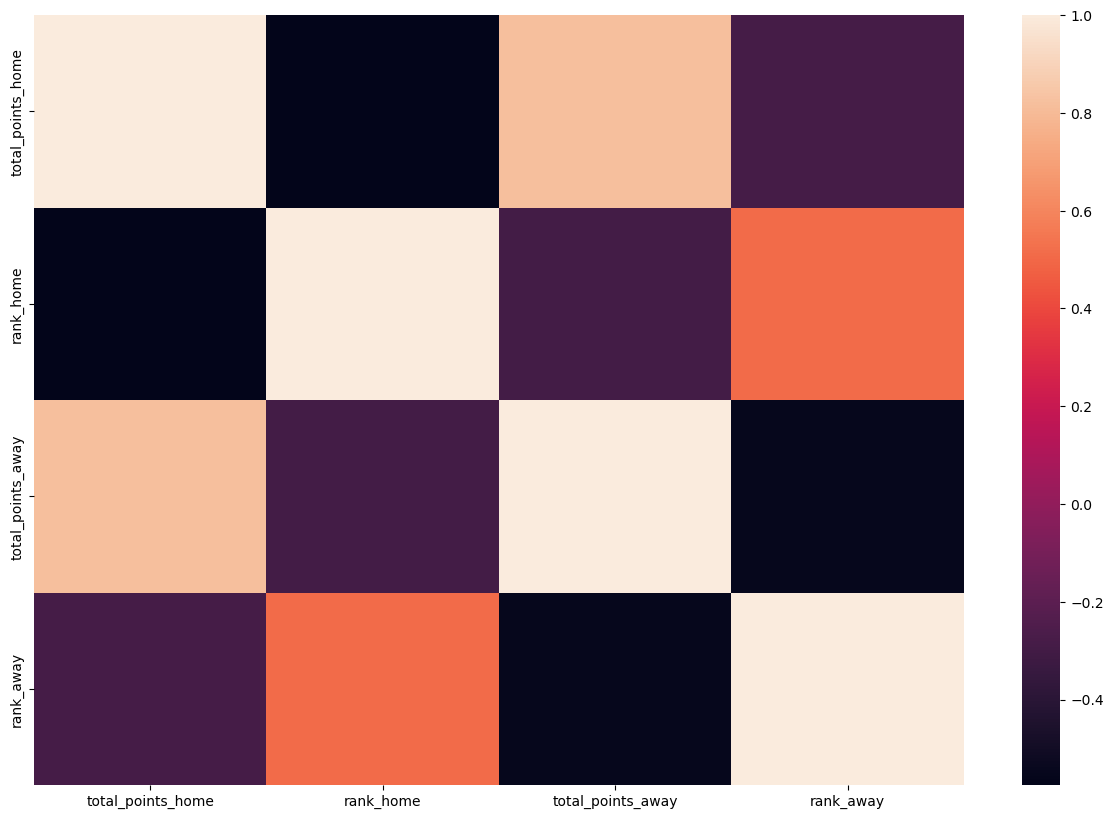

In [22]:
#FIFA 랭킹 포인트와 같은 팀의 FIFA 랭킹은 음의 상관 관계
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df[["total_points_home", "rank_home", "total_points_away", "rank_away"]].corr())
plt.show()

추가적인 열 생성

In [23]:
# 랭킹 차이
df["rank_dif"] = df["rank_home"] - df["rank_away"]
#게임에서의 득점 차이
df["sg"] = df["home_score"] - df["away_score"]
#상대 팀 랭킹 대비 게임에서 얻은 포인트
df["points_home_by_rank"] = df["home_team_points"]/df["rank_away"]
df["points_away_by_rank"] = df["away_team_points"]/df["rank_home"]

In [24]:
home_team = df[["date", "home_team", "home_score", "away_score", "rank_home", "rank_away","rank_change_home", "total_points_home", "result", "rank_dif", "points_home_by_rank", "home_team_points"]]

away_team = df[["date", "away_team", "away_score", "home_score", "rank_away", "rank_home","rank_change_away", "total_points_away", "result", "rank_dif", "points_away_by_rank", "away_team_points"]]

In [25]:
home_team.columns = [h.replace("home_", "").replace("_home", "").replace("away_", "suf_").replace("_away", "_suf") for h in home_team.columns]

away_team.columns = [a.replace("away_", "").replace("_away", "").replace("home_", "suf_").replace("_home", "_suf") for a in away_team.columns]

In [26]:
team_stats = pd.concat([home_team, away_team])#.sort_values("date")

In [27]:
team_stats.head()

,date,team,score,suf_score,rank,rank_suf,rank_change,total_points,result,rank_dif,points_by_rank,team_points
0,2015-01-09,Australia,4,1,100.0,125.0,0.0,329.0,0,-25.0,0.024000,3
1,2015-01-09,Senegal,1,0,35.0,62.0,0.0,734.0,0,-27.0,0.048387,3
2,2015-01-10,Cameroon,1,1,42.0,52.0,0.0,665.0,2,-10.0,0.019231,1
3,2015-01-10,South Korea,1,0,69.0,93.0,0.0,487.0,0,-24.0,0.032258,3
4,2015-01-10,Saudi Arabia,0,1,102.0,96.0,0.0,318.0,1,6.0,0.000000,0


In [28]:
#this column will be used to calculate features for simulation
team_stats_raw = team_stats.copy()

다음과 같은 요소들의 생각해보자 

- 아시안컵 주기 동안 팀의 평균 득점.
- 최근 5 경기에서 팀의 평균 득점.
- 아시안컵 주기 동안 팀이 소비한 평균 득점.
- 최근 5 경기에서 팀이 소비한 평균 득점.
- 아시안컵 주기 동안 팀이 마주한 상대팀의 평균 FIFA 랭킹.
- 최근 5 경기에서 팀이 마주한 상대팀의 평균 FIFA 랭킹.
- 주기 동안 획득한 FIFA 포인트.
- 최근 5 경기에서 획득한 FIFA 포인트.
- 주기 동안의 평균 게임 포인트.
- 최근 5 경기의 평균 게임 포인트.
- 주기 동안 상대 FIFA 랭킹에 따른 평균 게임 포인트.
- 최근 5 경기에서 상대 FIFA 랭킹에 따른 평균 게임 포인트

In [29]:
stats_val = []

for index, row in team_stats.iterrows():
    team = row["team"]
    date = row["date"]
    past_games = team_stats.loc[(team_stats["team"] == team) & (team_stats["date"] < date)].sort_values(by=['date'], ascending=False)
    last5 = past_games.head(5)
    
    goals = past_games["score"].mean()
    goals_l5 = last5["score"].mean()
    
    goals_suf = past_games["suf_score"].mean()
    goals_suf_l5 = last5["suf_score"].mean()
    
    rank = past_games["rank_suf"].mean()
    rank_l5 = last5["rank_suf"].mean()
    
    if len(last5) > 0:
        points = past_games["total_points"].values[0] - past_games["total_points"].values[-1]#qtd de pontos ganhos
        points_l5 = last5["total_points"].values[0] - last5["total_points"].values[-1] 
    else:
        points = 0
        points_l5 = 0
        
    gp = past_games["team_points"].mean()
    gp_l5 = last5["team_points"].mean()
    
    gp_rank = past_games["points_by_rank"].mean()
    gp_rank_l5 = last5["points_by_rank"].mean()
    
    stats_val.append([goals, goals_l5, goals_suf, goals_suf_l5, rank, rank_l5, points, points_l5, gp, gp_l5, gp_rank, gp_rank_l5])


In [30]:
len(stats_val)

12924

In [31]:
stats_cols = ["goals_mean", "goals_mean_l5", "goals_suf_mean", "goals_suf_mean_l5", "rank_mean", "rank_mean_l5", "points_mean", "points_mean_l5", "game_points_mean", "game_points_mean_l5", "game_points_rank_mean", "game_points_rank_mean_l5"]

stats_df = pd.DataFrame(stats_val, columns=stats_cols)

full_df = pd.concat([team_stats.reset_index(drop=True), stats_df], axis=1, ignore_index=False)

In [32]:
home_team_stats = full_df.iloc[:int(full_df.shape[0]/2),:]
away_team_stats = full_df.iloc[int(full_df.shape[0]/2):,:]

In [33]:
home_team_stats.columns[-12:]

Index(['goals_mean', 'goals_mean_l5', 'goals_suf_mean', 'goals_suf_mean_l5',
       'rank_mean', 'rank_mean_l5', 'points_mean', 'points_mean_l5',
       'game_points_mean', 'game_points_mean_l5', 'game_points_rank_mean',
       'game_points_rank_mean_l5'],
      dtype='object')

In [34]:
home_team_stats = home_team_stats[home_team_stats.columns[-12:]]
away_team_stats = away_team_stats[away_team_stats.columns[-12:]]

In [35]:
home_team_stats.columns = ['home_'+str(col) for col in home_team_stats.columns]
away_team_stats.columns = ['away_'+str(col) for col in away_team_stats.columns]

In [36]:
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [37]:
full_df = pd.concat([df, match_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [38]:
full_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,...,away_goals_suf_mean,away_goals_suf_mean_l5,away_rank_mean,away_rank_mean_l5,away_points_mean,away_points_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5
6457,2023-07-08,Panama,Qatar,4,0,Gold Cup,Arlington,United States,True,1399.23,...,1.150000,1.2,78.900000,62.6,1046.52,-0.04,1.658333,1.4,0.025406,0.054850
6458,2023-07-08,Mexico,Costa Rica,2,0,Gold Cup,Arlington,United States,True,1639.19,...,1.164948,1.2,54.814433,75.8,383.30,-12.82,1.309278,0.4,0.039123,0.004904
6459,2023-07-09,Guatemala,Jamaica,0,1,Gold Cup,Cincinnati,United States,True,1166.60,...,1.269231,1.4,79.641026,73.6,918.87,2.58,1.294872,1.0,0.019150,0.021026
6460,2023-07-12,Jamaica,Mexico,0,3,Gold Cup,Paradise,United States,True,1367.83,...,0.946970,0.4,55.060606,65.0,731.19,7.32,1.954545,2.4,0.077421,0.039027
6461,2023-07-16,Mexico,Panama,1,0,Gold Cup,Inglewood,United States,True,1639.19,...,1.360000,1.2,57.280000,47.0,842.23,0.00,1.330000,1.4,0.029696,0.028361


게임 중요성을 양적으로 나타내기 위해 경기의 대회를 나타내는 열 생성

In [39]:
def find_friendly(x):
    if x == "Friendly":
        return 1
    else: return 0

full_df["is_friendly"] = full_df["tournament"].apply(lambda x: find_friendly(x)) 

In [40]:
full_df = pd.get_dummies(full_df, columns=["is_friendly"])

In [41]:
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_

예측에 사용할 행 선택 

In [42]:
base_df = full_df[["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_dif", "rank_change_home", "rank_change_away", 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5','home_game_points_mean', 'home_game_points_mean_l5',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_l5','away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5',
       'is_friendly_0', 'is_friendly_1']]

base_df.tail()

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1
6457,2023-07-08,Panama,Qatar,57.0,58.0,4,0,0,-1.0,-1.0,...,1.313131,1.4,0.029474,0.022302,1.658333,1.4,0.025406,0.054850,1,0
6458,2023-07-08,Mexico,Costa Rica,14.0,42.0,2,0,0,-28.0,-1.0,...,1.946565,2.0,0.077467,0.029503,1.309278,0.4,0.039123,0.004904,1,0
6459,2023-07-09,Guatemala,Jamaica,116.0,63.0,0,1,1,53.0,0.0,...,1.523810,1.4,0.015821,0.023465,1.294872,1.0,0.019150,0.021026,1,0
6460,2023-07-12,Jamaica,Mexico,63.0,14.0,0,3,1,49.0,0.0,...,1.316456,1.4,0.019235,0.024275,1.954545,2.4,0.077421,0.039027,1,0
6461,2023-07-16,Mexico,Panama,14.0,57.0,1,0,0,-43.0,-1.0,...,1.962406,2.4,0.077197,0.038206,1.330000,1.4,0.029696,0.028361,1,0


In [43]:
base_df.isna().sum()

date                               0
home_team                          0
away_team                          0
rank_home                          0
rank_away                          0
home_score                         0
away_score                         0
result                             0
rank_dif                           0
rank_change_home                   0
rank_change_away                   0
home_goals_mean                   93
home_goals_mean_l5                93
home_goals_suf_mean               93
home_goals_suf_mean_l5            93
home_rank_mean                    93
home_rank_mean_l5                 93
home_points_mean                   0
home_points_mean_l5                0
away_goals_mean                  106
away_goals_mean_l5               106
away_goals_suf_mean              106
away_goals_suf_mean_l5           106
away_rank_mean                   106
away_rank_mean_l5                106
away_points_mean                   0
away_points_mean_l5                0
h

In [44]:
base_df.shape

(6462, 37)

In [45]:
base_df.dtypes

date                             datetime64[ns]
home_team                                object
away_team                                object
rank_home                               float64
rank_away                               float64
home_score                                int64
away_score                                int64
result                                    int64
rank_dif                                float64
rank_change_home                        float64
rank_change_away                        float64
home_goals_mean                         float64
home_goals_mean_l5                      float64
home_goals_suf_mean                     float64
home_goals_suf_mean_l5                  float64
home_rank_mean                          float64
home_rank_mean_l5                       float64
home_points_mean                        float64
home_points_mean_l5                     float64
away_goals_mean                         float64
away_goals_mean_l5                      

In [46]:
base_df = base_df.dropna()

In [47]:
base_df

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1
10,2015-01-13,Australia,Oman,100.0,93.0,4,0,0,7.0,0.0,...,3.000000,3.0,0.024000,0.024000,0.000000,0.0,0.000000,0.000000,1,0
12,2015-01-13,Kuwait,South Korea,125.0,69.0,0,1,1,56.0,1.0,...,0.000000,0.0,0.000000,0.000000,3.000000,3.0,0.032258,0.032258,1,0
16,2015-01-15,Bahrain,United Arab Emirates,110.0,80.0,1,2,1,30.0,-12.0,...,0.000000,0.0,0.000000,0.000000,3.000000,3.0,0.032609,0.032609,1,0
17,2015-01-15,Qatar,Iran,92.0,51.0,0,1,1,41.0,-3.0,...,0.000000,0.0,0.000000,0.000000,3.000000,3.0,0.027273,0.027273,1,0
19,2015-01-16,Iraq,Japan,114.0,54.0,0,1,1,60.0,11.0,...,3.000000,3.0,0.032258,0.032258,3.000000,3.0,0.026087,0.026087,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,2023-07-08,Panama,Qatar,57.0,58.0,4,0,0,-1.0,-1.0,...,1.313131,1.4,0.029474,0.022302,1.658333,1.4,0.025406,0.054850,1,0
6458,2023-07-08,Mexico,Costa Rica,14.0,42.0,2,0,0,-28.0,-1.0,...,1.946565,2.0,0.077467,0.029503,1.309278,0.4,0.039123,0.004904,1,0
6459,2023-07-09,Guatemala,Jamaica,116.0,63.0,0,1,1,53.0,0.0,...,1.523810,1.4,0.015821,0.023465,1.294872,1.0,0.019150,0.021026,1,0
6460,2023-07-12,Jamaica,Mexico,63.0,14.0,0,3,1,49.0,0.0,...,1.316456,1.4,0.019235,0.024275,1.954545,2.4,0.077421,0.039027,1,0


무승부 게임을 홈 팀의 패배로 간주하고 target 행 생성

In [48]:
df=base_df

In [49]:
def no_draw(x):
    if x == 2:
        return 1
    else:
        return x
    
df["target"] = df["result"].apply(lambda x: no_draw(x))

In [50]:
df.head()

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1,target
10,2015-01-13,Australia,Oman,100.0,93.0,4,0,0,7.0,0.0,...,3.0,0.024000,0.024000,0.0,0.0,0.000000,0.000000,1,0,0
12,2015-01-13,Kuwait,South Korea,125.0,69.0,0,1,1,56.0,1.0,...,0.0,0.000000,0.000000,3.0,3.0,0.032258,0.032258,1,0,1
16,2015-01-15,Bahrain,United Arab Emirates,110.0,80.0,1,2,1,30.0,-12.0,...,0.0,0.000000,0.000000,3.0,3.0,0.032609,0.032609,1,0,1
17,2015-01-15,Qatar,Iran,92.0,51.0,0,1,1,41.0,-3.0,...,0.0,0.000000,0.000000,3.0,3.0,0.027273,0.027273,1,0,1
19,2015-01-16,Iraq,Japan,114.0,54.0,0,1,1,60.0,11.0,...,3.0,0.032258,0.032258,3.0,3.0,0.026087,0.026087,1,0,1


Modeling 
- logistic regression

In [51]:
df.shape

(6326, 38)

In [52]:
df = df.drop(['home_score', 'away_score','result'], axis=1)

In [53]:
df.head()

,date,home_team,away_team,rank_home,rank_away,rank_dif,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,...,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1,target
10,2015-01-13,Australia,Oman,100.0,93.0,7.0,0.0,0.0,4.0,4.0,...,3.0,0.024000,0.024000,0.0,0.0,0.000000,0.000000,1,0,0
12,2015-01-13,Kuwait,South Korea,125.0,69.0,56.0,1.0,0.0,1.0,1.0,...,0.0,0.000000,0.000000,3.0,3.0,0.032258,0.032258,1,0,1
16,2015-01-15,Bahrain,United Arab Emirates,110.0,80.0,30.0,-12.0,-1.0,0.0,0.0,...,0.0,0.000000,0.000000,3.0,3.0,0.032609,0.032609,1,0,1
17,2015-01-15,Qatar,Iran,92.0,51.0,41.0,-3.0,0.0,1.0,1.0,...,0.0,0.000000,0.000000,3.0,3.0,0.027273,0.027273,1,0,1
19,2015-01-16,Iraq,Japan,114.0,54.0,60.0,11.0,0.0,1.0,1.0,...,3.0,0.032258,0.032258,3.0,3.0,0.026087,0.026087,1,0,1


In [74]:
X = df.iloc[:, 3:-1]  # Assuming the target column is the last column
y = df[["target"]]

In [75]:
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [76]:
y = np.ravel(y)

In [57]:
# StandardScaler를 사용하여 데이터 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=123)

In [78]:
model = LogisticRegression() 
model.fit(X_train, y_train)

C:\Users\rkdal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

In [61]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7101105845181674


In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[396, 193],
       [174, 503]], dtype=int64)

In [63]:
df.columns

Index(['date', 'home_team', 'away_team', 'rank_home', 'rank_away', 'rank_dif',
       'rank_change_home', 'rank_change_away', 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5',
       'home_game_points_mean', 'home_game_points_mean_l5',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_l5',
       'away_game_points_mean', 'away_game_points_mean_l5',
       'away_game_points_rank_mean', 'away_game_points_rank_mean_l5',
       'is_friendly_0', 'is_friendly_1', 'target'],
      dtype='object')

In [64]:
def analyze(model):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1]) #test AUC
    plt.figure(figsize=(15,10))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label="test")

    fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train)[:,1]) #train AUC
    plt.plot(fpr_train, tpr_train, label="train")
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])
    plt.legend()
    plt.title('AUC score is %.2f on test and %.2f on training'%(auc_test, auc_train))
    plt.show()
    
    plt.figure(figsize=(15, 10))
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt="d")

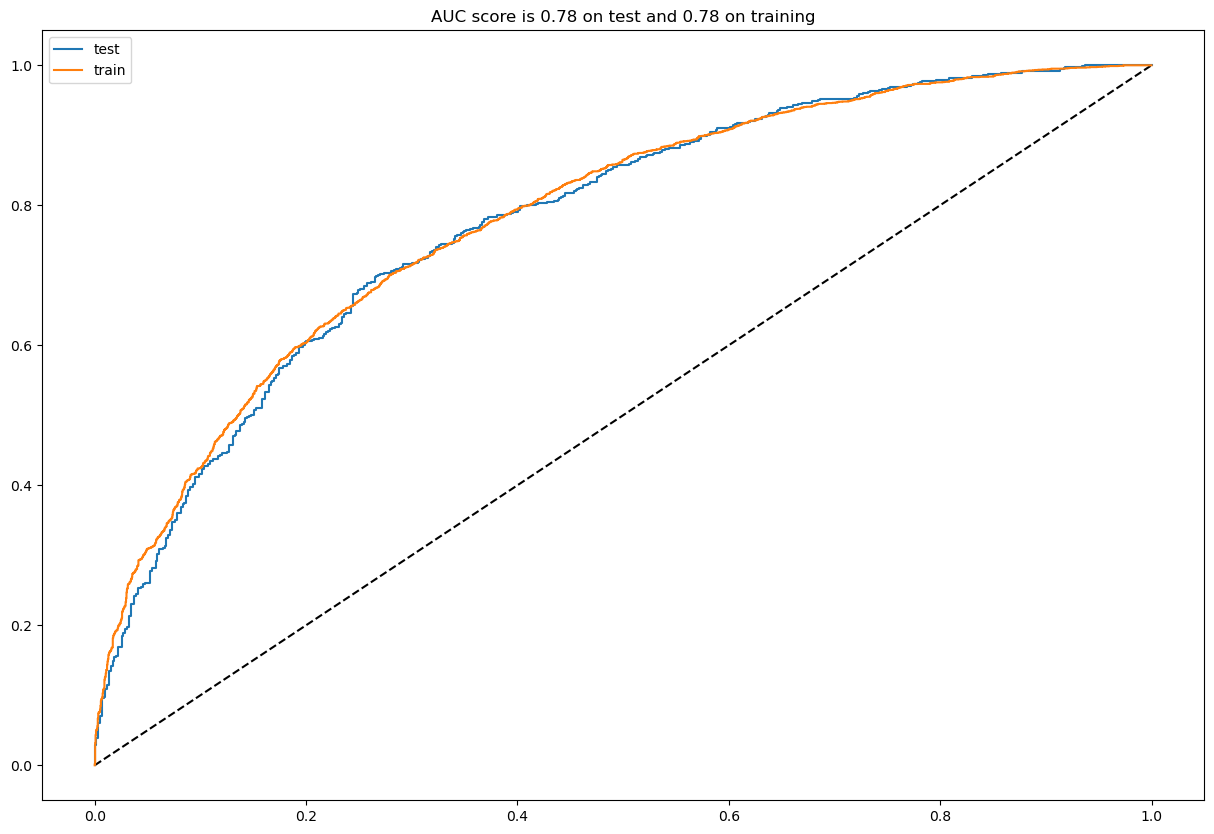

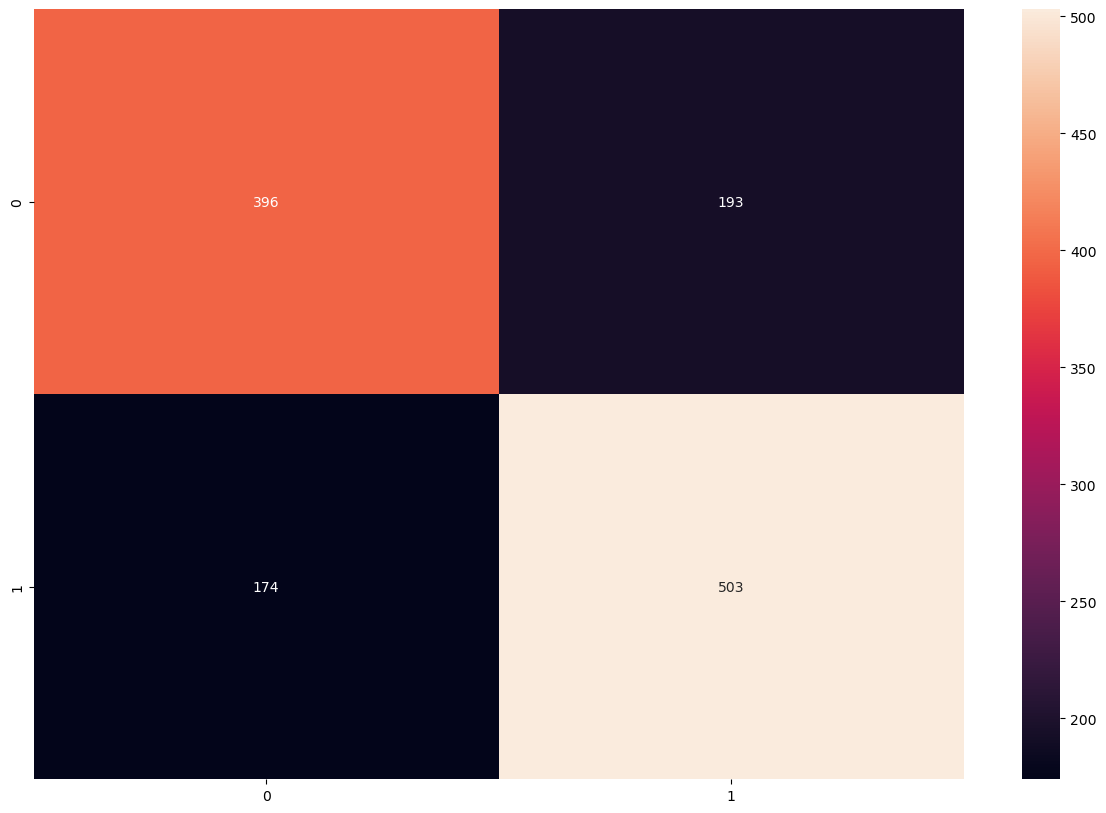

In [65]:
analyze(model)

In [66]:
coefficients = model.coef_[0]
coefficients

array([ 0.19744745, -0.20710795,  0.40821223, -0.0554333 , -0.01658145,
       -0.25742994, -0.00602569,  0.27366945,  0.16953886,  0.44019132,
        0.14109333,  0.09833211, -0.00494766,  0.26284127,  0.10185475,
       -0.28441395, -0.12722567, -0.60934397, -0.02172141, -0.11204012,
       -0.04638335,  0.10603157,  0.01358647, -0.03129563,  0.03797871,
       -0.19713696,  0.0259031 ,  0.0271349 , -0.04603593, -0.01528008,
        0.01528008])

In [67]:
feature_names = df.columns
feature_names

Index(['date', 'home_team', 'away_team', 'rank_home', 'rank_away', 'rank_dif',
       'rank_change_home', 'rank_change_away', 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5',
       'home_game_points_mean', 'home_game_points_mean_l5',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_l5',
       'away_game_points_mean', 'away_game_points_mean_l5',
       'away_game_points_rank_mean', 'away_game_points_rank_mean_l5',
       'is_friendly_0', 'is_friendly_1', 'target'],
      dtype='object')

date: 0.1974474522624424
home_team: -0.20710794514591935
away_team: 0.4082122281456673
rank_home: -0.055433302197868066
rank_away: -0.01658144537696265
rank_dif: -0.25742994161445104
rank_change_home: -0.006025693227170022
rank_change_away: 0.27366944897559237
home_goals_mean: 0.1695388624379659
home_goals_mean_l5: 0.4401913172784497
home_goals_suf_mean: 0.14109333455624723
home_goals_suf_mean_l5: 0.09833211380134547
home_rank_mean: -0.004947655760065934
home_rank_mean_l5: 0.2628412731303972
home_points_mean: 0.10185475466627267
home_points_mean_l5: -0.28441394750782184
away_goals_mean: -0.12722566973517263
away_goals_mean_l5: -0.6093439699614304
away_goals_suf_mean: -0.02172141063932289
away_goals_suf_mean_l5: -0.11204012496750006
away_rank_mean: -0.046383346110599244
away_rank_mean_l5: 0.10603156569379675
away_points_mean: 0.013586468041172122
away_points_mean_l5: -0.03129563353383127
home_game_points_mean: 0.037978706890528915
home_game_points_mean_l5: -0.19713695864008327
home_game

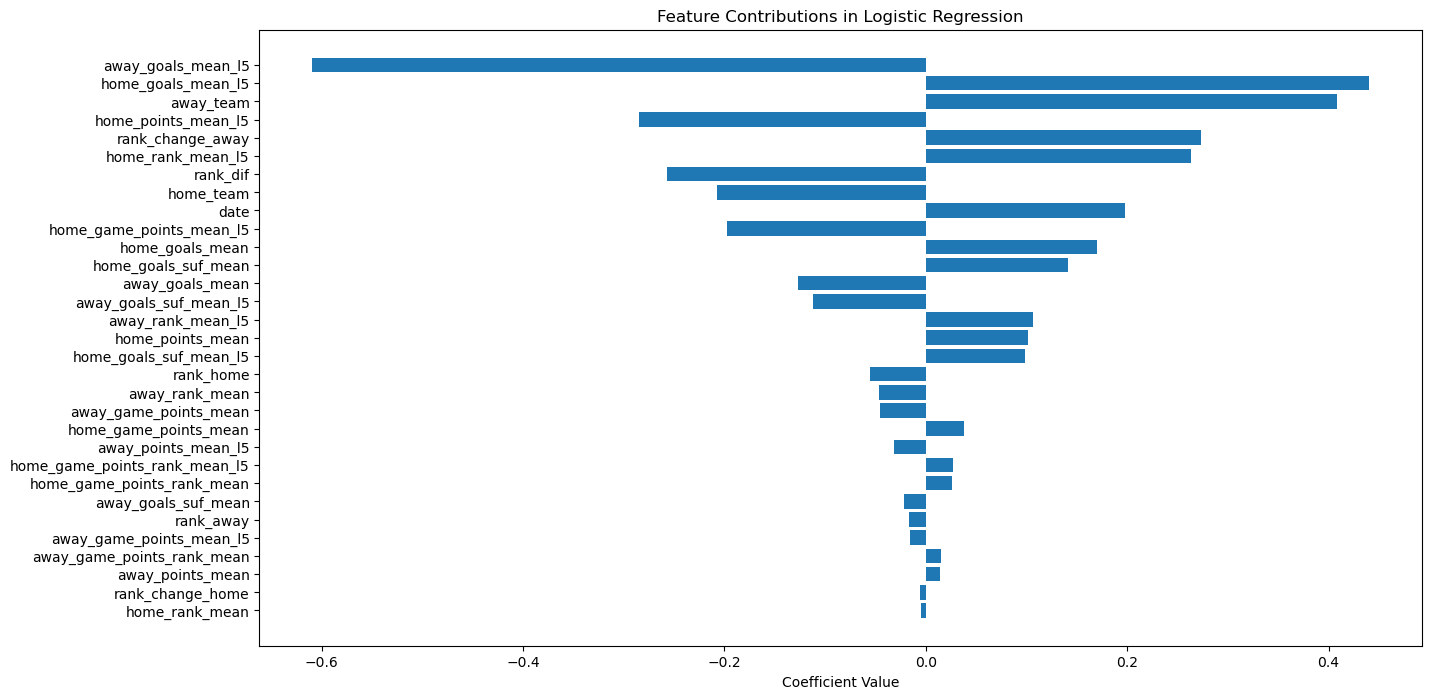

In [68]:
for feature, coef in zip(feature_names, coefficients):
    print(f'{feature}: {coef}')

# You can also visualize the coefficients
sorted_indices = np.argsort(np.abs(coefficients))
sorted_feature_names = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

plt.figure(figsize=(15, 8))
plt.barh(range(len(sorted_feature_names)), sorted_coefficients, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Coefficient Value')
plt.title('Feature Contributions in Logistic Regression')
plt.show()

각 팀별 승류 비교 (한국,일본,이란)

vs 일본

In [79]:
# Assuming df is your DataFrame
korea_japan_df = df[df['home_team'].isin(['South Korea', 'Japan']) & df['away_team'].isin(['South Korea', 'Japan'])].iloc[[-1]]

In [80]:
korea_japan_df

,date,home_team,away_team,rank_home,rank_away,rank_dif,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,...,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1,target
4377,2021-03-25,Japan,South Korea,27.0,38.0,-11.0,0.0,0.0,1.973684,1.2,...,1.4,0.03654,0.015882,1.935065,2.4,0.077794,0.044271,0,1,0


In [81]:
korea_japan_df=korea_japan_df.iloc[:, 3:-1]

In [82]:
k_j=korea_japan_df.values

In [83]:
model.predict_proba(k_j)

C:\Users\rkdal\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.50093967, 0.49906033]])

vs 이란

In [84]:
korea_iran_df = df[df['home_team'].isin(['South Korea', 'Iran']) & df['away_team'].isin(['South Korea', 'Iran'])].iloc[[-1]]

In [85]:
korea_iran_df

,date,home_team,away_team,rank_home,rank_away,rank_dif,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,...,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1,target
5461,2022-03-24,South Korea,Iran,29.0,21.0,8.0,-4.0,0.0,1.736264,3.0,...,3.0,0.070362,0.034618,2.28,2.6,0.033794,0.035832,1,0,0


In [86]:
korea_iran_df=korea_iran_df.iloc[:, 3:-1]

In [87]:
k_i=korea_iran_df.values

In [88]:
model.predict_proba(k_i)

C:\Users\rkdal\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.37064337, 0.62935663]])

In [89]:
k_j_df=df[df['away_team'] == 'South Korea'].iloc[[-1]]